In [15]:
!pip install vaderSentiment --quiet


In [16]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\birva\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\birva\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\birva\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [19]:
# Load datasets
twitter_df = pd.read_csv("twitter_sentiment.csv")
employment_df = pd.read_csv("employment_cleaned.csv")
labour_df = pd.read_csv("labour_force_cleaned.csv")


In [20]:
# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [21]:
# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

In [22]:
# Apply sentiment analysis on each tweet
twitter_df[['neg', 'neu', 'pos', 'compound']] = twitter_df['tweet_text'].apply(
    lambda x: pd.Series(analyzer.polarity_scores(str(x)))
)

In [23]:
## Classify sentiment based on compound score
def vader_label(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

twitter_df['sentiment_label'] = twitter_df['compound'].apply(vader_label)


In [24]:
 #Show first  rows with sentiment scores
print(twitter_df[['tweet_text', 'compound', 'sentiment_label']].head())

                                          tweet_text  compound sentiment_label
0  Canada faces an economic crossroads: - Unemplo...   -0.7269        Negative
1  Donovan Canada's unemployment rate has now hit...   -0.4404        Negative
2  BREAKING CANADIAN YOUTH 139 696 68K UNEMPLOYME...   -0.2263        Negative
3  Canada just posted a 7% UNEMPLOYMENT rate. Up ...   -0.5622        Negative
4        Canadian Rate Has Now Hit 7% 2 Unemployment   -0.4404        Negative


In [38]:
sentiment_counts = twitter_df['sentiment_label'].value_counts()
sentiment_percentages = sentiment_counts / len(twitter_df) * 100
print(sentiment_counts, sentiment_percentages)


sentiment_label
Negative    1266
Positive     242
Neutral       42
Name: count, dtype: int64 sentiment_label
Negative    81.677419
Positive    15.612903
Neutral      2.709677
Name: count, dtype: float64


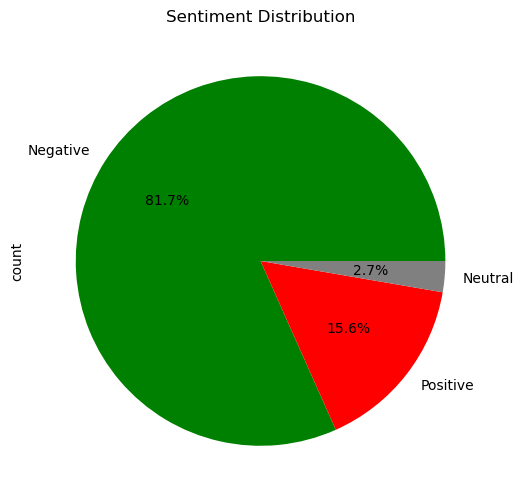

In [39]:
sentiment_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(6,6), colors=['green','red','gray'])
plt.title("Sentiment Distribution")
plt.show()


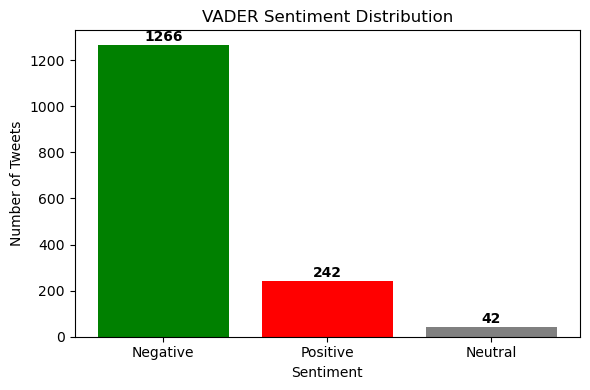

In [25]:
# Count sentiments
sentiment_counts = twitter_df['sentiment_label'].value_counts()

# Plot
plt.figure(figsize=(6, 4))
bars = plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'red', 'gray'])

# Add counts on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 5, str(height),
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title('VADER Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

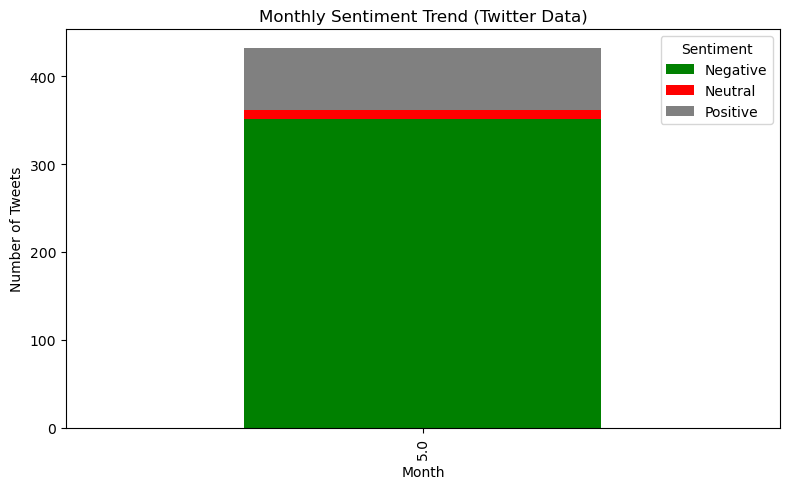

In [29]:
twitter_df['date'] = pd.to_datetime(twitter_df['date'] + ' 2025', errors='coerce')

monthly_sentiment = twitter_df.groupby([twitter_df['date'].dt.month, 'sentiment_label']) \
                              .size().unstack(fill_value=0)

monthly_sentiment.plot(kind='bar', stacked=True, figsize=(8, 5), color=['green', 'red', 'gray'])
plt.title("Monthly Sentiment Trend (Twitter Data)")
plt.xlabel("Month")
plt.ylabel("Number of Tweets")
plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()


In [37]:
twitter_df['date'].unique()


<DatetimeArray>
['2025-05-14 20:25:00',                 'NaT', '2025-05-09 20:25:00',
 '2025-05-10 20:25:00', '2025-05-19 20:25:00', '2025-05-31 20:25:00',
 '2025-05-30 20:25:00', '2025-05-29 20:25:00', '2025-05-28 20:25:00',
 '2025-05-27 20:25:00', '2025-05-26 20:25:00', '2025-05-25 20:25:00',
 '2025-05-24 20:25:00', '2025-05-23 20:25:00', '2025-05-22 20:25:00',
 '2025-05-21 20:25:00', '2025-05-20 20:25:00', '2025-05-18 20:25:00',
 '2025-05-17 20:25:00', '2025-05-16 20:25:00', '2025-05-15 20:25:00',
 '2025-05-13 20:25:00', '2025-05-12 20:25:00', '2025-05-11 20:25:00',
 '2025-05-08 20:25:00', '2025-05-07 20:25:00', '2025-05-06 20:25:00',
 '2025-05-05 20:25:00', '2025-05-04 20:25:00', '2025-05-03 20:25:00',
 '2025-05-02 20:25:00', '2025-05-01 20:25:00']
Length: 32, dtype: datetime64[ns]

In [31]:
# Combine sentiment data with employment stats
monthly_sentiment.reset_index(inplace=True)
monthly_sentiment.rename(columns={'level_0': 'month'}, inplace=True)  # Ensure month column

# Add employment change column for May and April 2025
employment_change = employment_df[['class_of_worker', 'change_apr_may_2025']]

# Example: Merge sentiment counts with employment changes (basic merge for analysis)
combined_data = monthly_sentiment.copy()

# Use mean change and label it as 'in thousands'
combined_data['employment_change_thousand'] = employment_change['change_apr_may_2025'].mean()

print("Combined Sentiment & Employment Data (Change in Thousands):")
print(combined_data)


Combined Sentiment & Employment Data (Change in Thousands):
sentiment_label  index  date  Negative  Neutral  Positive  \
0                    0   5.0       352       10        70   

sentiment_label  employment_change_thousand  
0                                  3.252174  


### **Insights from Sentiment and Employment Data**

- **Tweet Sentiment Distribution:**
  - Negative tweets: **352**
  - Neutral tweets: **10**
  - Positive tweets: **70**
  - **Observation:** Negative tweets dominate the conversation, reflecting public concern about employment/unemployment trends.

- **Employment Change (April → May 2025):**
  - Average employment change across all worker categories is **+3.25 thousand jobs**.
  - This positive change suggests a slight improvement in employment, but public sentiment remains mostly negative.

- **Key Insight:**
  - Even though employment increased by a few thousand jobs, the sentiment is largely negative.
  - This mismatch could indicate public dissatisfaction with the pace of job growth or other economic factors not directly reflected in employment numbers.


In [34]:
# Extract key rows: Employment and Unemployment
employment_value = labour_df.loc[labour_df['Unnamed: 0'] == 'Employment', ['april_2025', 'may_2025']].values.flatten()
unemployment_value = labour_df.loc[labour_df['Unnamed: 0'] == 'Unemployment', ['april_2025', 'may_2025']].values.flatten()

# Combine with monthly sentiment
combined_sentiment_labour = monthly_sentiment.copy()
combined_sentiment_labour['april_2025_employment'] = employment_value[0]
combined_sentiment_labour['may_2025_employment'] = employment_value[1]
combined_sentiment_labour['april_2025_unemployment'] = unemployment_value[0]
combined_sentiment_labour['may_2025_unemployment'] = unemployment_value[1]

print("Combined Sentiment & Labour Data:")
print(combined_sentiment_labour)


Combined Sentiment & Labour Data:
sentiment_label  Negative  Neutral  Positive  april_2025_employment  \
date                                                                  
5.0                   352       10        70                  248.1   

sentiment_label  may_2025_employment  april_2025_unemployment  \
date                                                            
5.0                            248.5                     26.2   

sentiment_label  may_2025_unemployment  
date                                    
5.0                               26.7  


### **Insights from Combined Sentiment & Labour Data (April–May 2025)**

- **Tweet Sentiment:**
  - Negative tweets: **352**
  - Neutral tweets: **10**
  - Positive tweets: **70**
  - **Observation:** Negative sentiment dominates, indicating public concern about employment and economic conditions.

- **Employment Statistics:**
  - Employment increased from **248.1k (April 2025)** to **248.5k (May 2025)**.
  - Unemployment increased slightly from **26.2k (April 2025)** to **26.7k (May 2025)**.
  - **Insight:** Despite a small increase in employment, unemployment also grew slightly, which could explain the predominance of negative sentiment.

- **Key Insight:**
  - There is a visible **mismatch between employment growth and public sentiment**.
  - The increase in negative tweets despite minor job growth suggests public dissatisfaction, possibly due to **sectoral job losses** or **wage concerns** not captured in overall employment numbers.


In [36]:
# Extract key rows: Employment and Unemployment for May 2024 → May 2025
employment_change_annual = labour_df.loc[labour_df['Unnamed: 0'] == 'Employment', 'change_may2024_may2025'].values[0]
unemployment_change_annual = labour_df.loc[labour_df['Unnamed: 0'] == 'Unemployment', 'change_may2024_may2025'].values[0]

# Combine sentiment and labour data
combined_sentiment_labour = pd.DataFrame({
    'Negative_Tweets': [sentiment_counts.get('Negative', 0)],
    'Neutral_Tweets': [sentiment_counts.get('Neutral', 0)],
    'Positive_Tweets': [sentiment_counts.get('Positive', 0)],
    'Employment_Change_May2024_to_May2025': [employment_change_annual],
    'Unemployment_Change_May2024_to_May2025': [unemployment_change_annual]
})

# Display results
print("Combined Sentiment & Labour Data (May 2024 → May 2025):")
print(combined_sentiment_labour)

Combined Sentiment & Labour Data (May 2024 → May 2025):
   Negative_Tweets  Neutral_Tweets  Positive_Tweets  \
0             1266              42              242   

   Employment_Change_May2024_to_May2025  \
0                                   4.0   

   Unemployment_Change_May2024_to_May2025  
0                                     0.5  


### **Insights from Combined Sentiment & Labour Data (<span style="color:blue;">May 2024 → May 2025</span>)**

- **Tweet Sentiment Analysis:**
  - Negative Tweets: **1,266**
  - Neutral Tweets: **42**
  - Positive Tweets: **242**
  - **Observation:** The majority of tweets are negative, indicating significant public concern about employment and economic conditions.

- **Labour Force Changes:**
  - **Employment Change:** **+4.0 thousand** jobs between May 2024 and May 2025.
  - **Unemployment Change:** **+0.5 thousand** (slight increase in unemployment).

- **Key Insight:**
  - Despite a positive increase in employment, negative sentiment dominates, suggesting that public perception does not fully align with the reported labour market improvements.
  - This could indicate underlying dissatisfaction, such as job quality concerns or wage issues, even with employment growth.


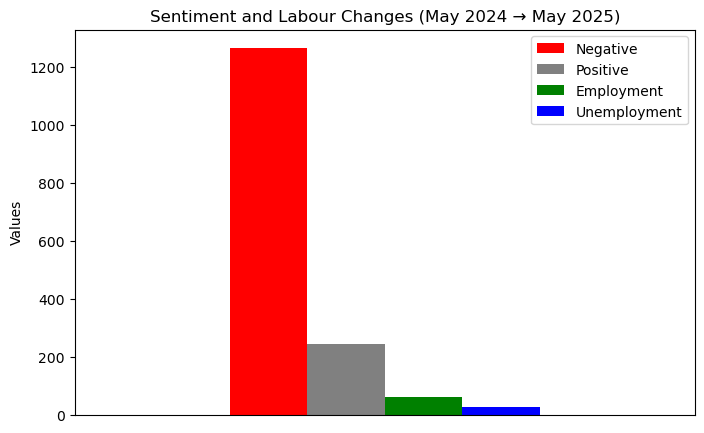

In [43]:
combined_df.plot(kind='bar', figsize=(8,5), color=['red', 'gray', 'green', 'blue', 'orange'])
plt.title("Sentiment and Labour Changes (May 2024 → May 2025)")
plt.xticks([])
plt.ylabel("Values")
plt.show()

